# Generating Training Data
For these images we needed to retrain our cellpose model, which needs a minimum of 5 labels per image. Since each image only contains one mask we generate collages that we use for training:

In [1]:
import skimage.io as io 
import numpy as np
import os
import organoid_prediction_python as opp

# needs to be changed to repository directory
home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"

folder = home_directory + r"image_data\Processed Data\Focussed Images\48h\Brightfield"
files = os.listdir(folder)

images = np.array([io.imread(f"{folder}/{file}") for file in files])
images.shape

(438, 598, 712)

In [2]:
def min_max_scaling(img):
    return (img-np.min(img))/(np.max(img)-np.min(img))

scaled = np.array([min_max_scaling(img) for img in images])
scaled.shape

(438, 598, 712)

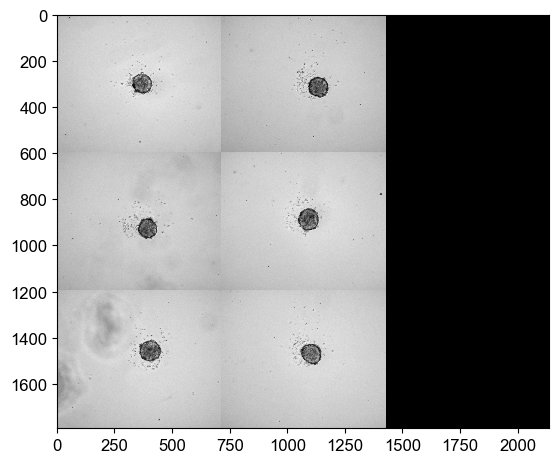

In [3]:
collages = [
    np.concatenate(
        [
            np.vstack(
                [scaled[i+j] if i+j<len(scaled) 
                 else np.zeros((598,712)) for i in range(3)]
            ) for j in range(k,k+9,3)]
        ,axis=1) for k in range(0,len(scaled),9)
]
io.imshow(collages[-1])

In [5]:
output = home_directory + r"image_data\Processed Data\Montages for Classification\48h"
if not os.path.exists(output):
   os.makedirs(output)
   print("The new directory is created!")

for i,image in enumerate(collages):
    io.imsave(f"{output}/collage_{i}.tif",image)